# NER

In [1]:
from pandarallel import pandarallel
import multiprocessing
num_processors = multiprocessing.cpu_count()
workers = num_processors-1
print(f'Available CPUs: {num_processors}')
pandarallel.initialize(nb_workers=num_processors-1, use_memory_fs=False)
from collections import Counter

Available CPUs: 64
INFO: Pandarallel will run on 63 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [2]:
import pandas as pd

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 500)

In [3]:
import os
import requests
import nltk as nltk
import nltk.corpus  
from nltk.text import Text
import re
import sys
import matplotlib.pyplot as plt

In [4]:
import spacy 
from spacy import displacy

#### Read Data

In [5]:
%%time

df = pd.read_csv('df_news_NER.csv')

CPU times: user 8.03 s, sys: 1.3 s, total: 9.33 s
Wall time: 9.31 s


In [6]:
df.head(2)

,clean_text
0,"Artificial improves parking efficiency in Chinese cities People s Daily We Are , March , Home Artificial improves parking efficiency in Chinese citiesBy Liu Shiyao People s Daily , March , Photo taken on July , , shows a sign for electronic toll collection ETC newly set up at a roadside parking space on Yangzhuang road, Shijingshan district, Beijing. Some urban areas of the city started to use ETC system for roadside parking spaces since July , . People s Daily Online Li to the application o..."
1,"Children With Autism Saw Their Learning and Social Skills Boosted After Playing With This AI Robot News Parliament Skip to , February , Latest in conferences How can we get him to forestall Drax power station to cease burning coal in March Coronavirus Could Explode in the U.S. Overnight Like it Did in Dettol sales surge as markets fall againLevi Strauss marks the next phase in corporate paid leave the Real Story World Children With Autism Saw Their Learning and Social Skills Boosted After Pl..."


In [7]:
# Load SpaCy model
nlp = spacy.load("en_core_web_md")

In [9]:
%%time

entities_dict = {"Entities": [], "Labels": []}

entities = []
labels = []

for doc in nlp.pipe(texts=df.loc[:,'clean_text'], disable=['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer'], n_process=workers, batch_size = 300):
    for ent in doc.ents:
        entities.append(ent.text)
        labels.append(ent.label_)
for entity, label in set(zip(entities, labels)): #iterate over unique entities
    if label in ["ORG","PERSON","PRODUCT"]:
        entities_dict["Entities"].append(entity)
        entities_dict["Labels"].append(label)

dftest = pd.DataFrame(entities_dict)
dftest

CPU times: user 17min 37s, sys: 53.7 s, total: 18min 30s
Wall time: 19min 26s


,Entities,Labels
0,Audrey Tang,PERSON
1,Luke Peffers,PERSON
2,AI Accelerator ChipsetsGTI s AI,ORG
3,"Inc Actapio, Inc.",ORG
4,AI Kitchen Generation,ORG
...,...,...
1692227,PhDstudents,PERSON
1692228,Bioethanol,PERSON
1692229,the Clemson Tigers,ORG
1692230,Lumakras Meets Goal,PERSON


#### Apply NER

In [10]:
%%time 

org = []

for doc in nlp.pipe(texts = df.loc[:,'clean_text'], disable=['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer'],n_process = workers, batch_size = 300):
    for token in doc:
        if token.ent_type_ == 'ORG':
            org.append(token.lower_)


CPU times: user 16min 50s, sys: 58.9 s, total: 17min 49s
Wall time: 18min 24s


In [11]:
%%time 

person = []

for doc in nlp.pipe(texts = df.loc[:,'clean_text'], disable=['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer'],n_process = workers, batch_size = 300):
    for token in doc:
        if token.ent_type_ == 'PERSON':
            person.append(token.lower_)


CPU times: user 16min 38s, sys: 1min 5s, total: 17min 43s
Wall time: 18min 10s


In [12]:
%%time 

product = []

for doc in nlp.pipe(texts = df.loc[:,'clean_text'], disable=['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer'], n_process = workers, batch_size = 300):
    for token in doc:
        if token.ent_type_ ==  'PRODUCT':
            product.append(token.lower_)


CPU times: user 16min 45s, sys: 1min 3s, total: 17min 49s
Wall time: 18min 14s


In [13]:
Counter(org).most_common(20)

[('ai', 668231),
 ('the', 497348),
 ('s', 304429),
 ('market', 257062),
 (',', 241498),
 ('news', 196448),
 ('of', 195913),
 ('media', 187522),
 ('group', 179635),
 ('inc.', 177817),
 ('google', 166118),
 ('gray', 155542),
 ('and', 149597),
 ('microsoft', 138476),
 ('data', 121163),
 ('global', 112340),
 ('artificial', 90357),
 ('learning', 86126),
 ('machine', 83220),
 ('research', 80293)]

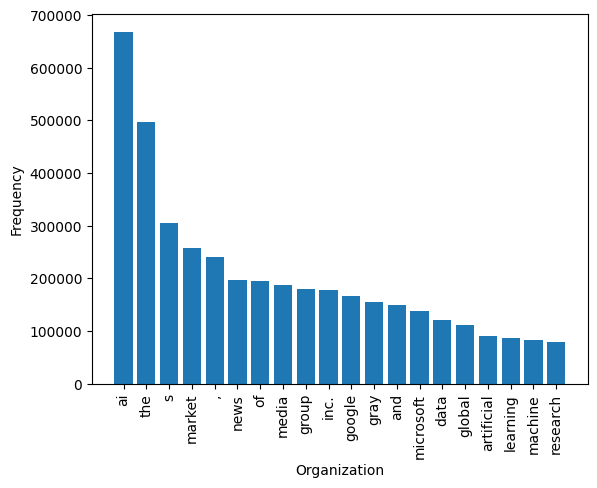

In [14]:
top_20_org = dict(Counter(org).most_common(20))

plt.bar(top_20_org.keys(), top_20_org.values())
plt.xticks(rotation=90)
plt.xlabel('Organization')
plt.ylabel('Frequency')
plt.show()

In [15]:
Counter(person).most_common(20)

[('s', 60265),
 ('don', 30023),
 ('musk', 27564),
 ('bard', 24182),
 ('ai', 20899),
 ('john', 18464),
 ('chatgpt', 17861),
 ('david', 17336),
 ('uscontact', 17094),
 ('michael', 16043),
 ('elon', 15562),
 ('biden', 15409),
 ('mark', 12631),
 ('trump', 11938),
 ('james', 11652),
 ('tom', 11315),
 ('joe', 10499),
 ('jones', 10158),
 ('johnson', 9760),
 ('chris', 9695)]

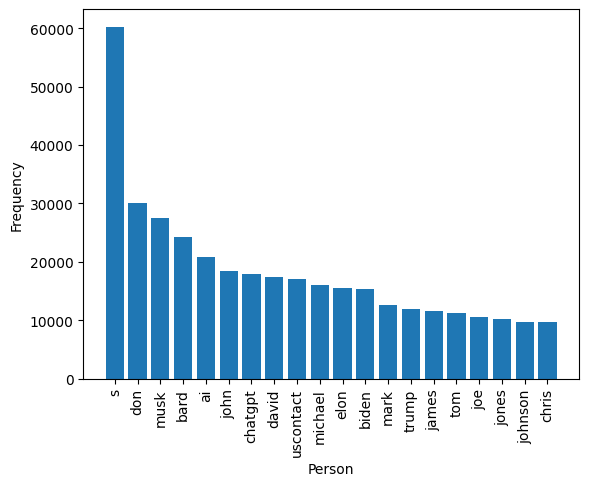

In [16]:
top_20_person = dict(Counter(person).most_common(20))

plt.bar(top_20_person.keys(), top_20_person.values())
plt.xticks(rotation=90)
plt.xlabel('Person')
plt.ylabel('Frequency')
plt.show()

In [17]:
Counter(product).most_common(20)

[('s', 36137),
 ('ai', 26047),
 ('google', 18513),
 ('cloud', 12659),
 ('the', 10705),
 ('nvidia', 6456),
 ('windows', 5440),
 ('twitter', 5312),
 ('saas', 5176),
 ('playstation', 3625),
 ('gpt', 3287),
 ('weather', 3113),
 ('openai', 3035),
 ('linux', 2877),
 ('discovery', 2797),
 ('midjourney', 2739),
 ('g', 2512),
 ('excel', 2506),
 ('a', 2433),
 ('news', 2410)]

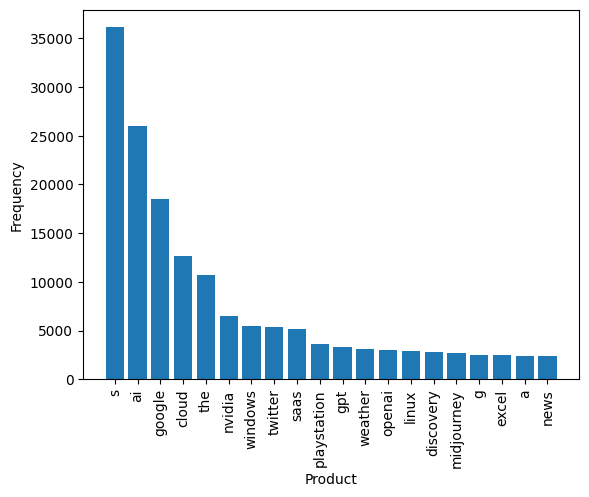

In [18]:
top_20_product = dict(Counter(product).most_common(20))

plt.bar(top_20_product.keys(), top_20_product.values())
plt.xticks(rotation=90)
plt.xlabel('Product')
plt.ylabel('Frequency')
plt.show()